#Dataset Description

\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer



In [128]:
df=pd.read_csv('/content/Task (1) Dataset.csv')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [130]:
df.value_counts('Fitness_of_casuality')

,count
Fitness_of_casuality,
Normal,9608
NormalNormal,19
Blind,18
Deaf,18
Other,18


In [131]:
df.value_counts('Defect_of_vehicle')

,count
Defect_of_vehicle,
No defect,7777
7,76
5,36


In [132]:
df.value_counts('Service_year_of_vehicle')

,count
Service_year_of_vehicle,
Unknown,2883
2-5yrs,1792
Above 10yr,1324
5-10yrs,1280
1-2yr,827
Below 1yr,282


### Handle Missing Values

In [133]:
df.drop(columns=['Fitness_of_casuality'],inplace=True)
df.drop(columns=['Defect_of_vehicle'],inplace=True)
df.drop(columns=['Service_year_of_vehicle'],inplace=True)
df.drop(columns=['Work_of_casuality'],inplace=True)

In [134]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Area_accident_occured,239


In [135]:
df.duplicated().sum()

0

In [136]:


imputer = SimpleImputer(strategy='most_frequent')

columns_to_impute = [
    'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
    'Lanes_or_Medians', 'Type_of_collision', 'Vehicle_movement', 'Road_allignment',
    'Educational_level', 'Vehicle_driver_relation', 'Types_of_Junction',
    'Road_surface_type'
]

df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [137]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


In [138]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


<Axes: >

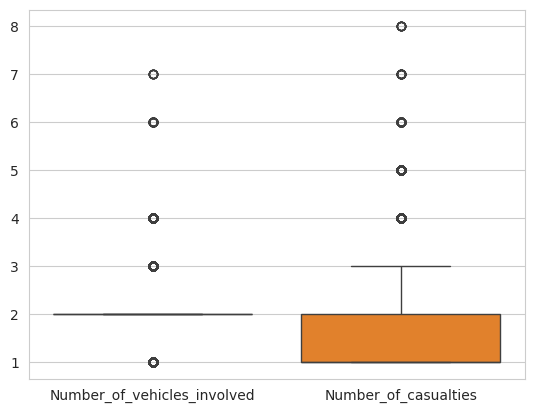

In [139]:
sns.boxplot(df)

### Ensure data types are appropriate for each column.

---



In [140]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Area_accident_occured,object


In [141]:
dfEncoder=df.apply(LabelEncoder().fit_transform)
df['Accident_severity']=LabelEncoder().fit_transform(df['Accident_severity'])

## 2. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [142]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
count,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,1.832819
std,0.688790,1.007179,0.406082
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000
50%,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,7.000000,8.000000,2.000000


In [143]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,...,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,14,...,4,9,10,13,4,3,6,4,9,20
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Other,...,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Not a Pedestrian,No distancing
freq,120,2041,4271,11437,8360,10206,4192,4155,10941,4058,...,8798,10063,8929,8466,4944,5253,4443,7076,11390,2263


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

### Identify and analyze patterns in the data.

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver'>

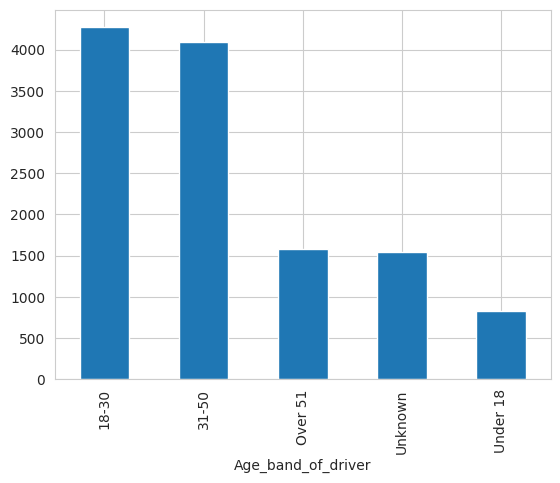

In [145]:
dfc=df['Age_band_of_driver'].value_counts()
dfc.plot(kind='bar')

<Axes: xlabel='Type_of_vehicle'>

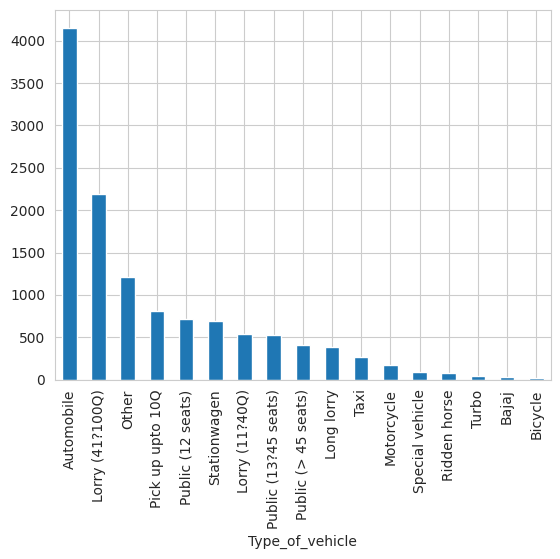

In [146]:
dfc=df['Type_of_vehicle'].value_counts()
dfc.plot(kind='bar')

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


                    Age_band_of_driver  Accident_severity
Age_band_of_driver            1.000000           0.013185
Accident_severity             0.013185           1.000000


<Axes: >

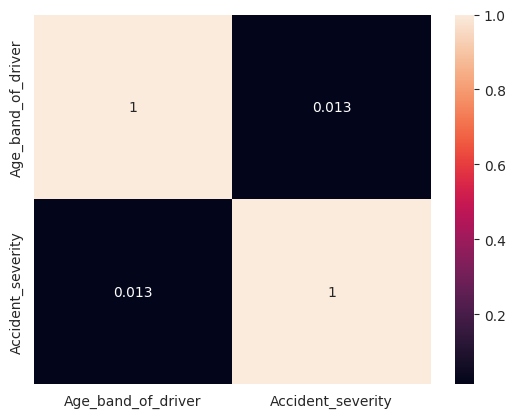

In [147]:
dfc=dfEncoder[[ 'Age_band_of_driver', 'Accident_severity']].corr()
print(dfc)
sns.heatmap(dfc,annot=True)

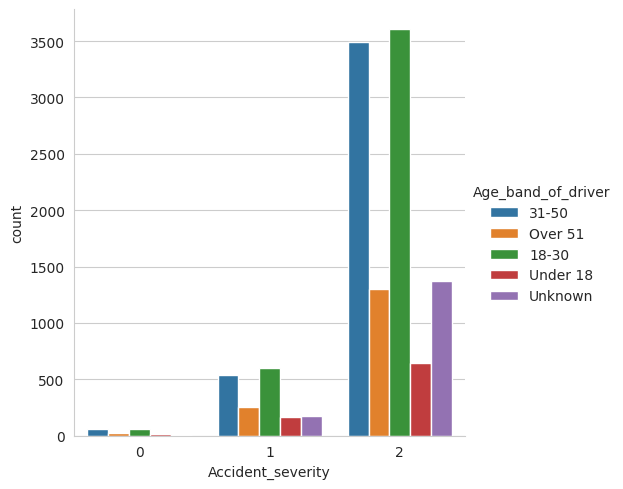

In [148]:
sns.catplot(data=df, x='Accident_severity', hue="Age_band_of_driver",kind="count")

## 3. Data Visualization

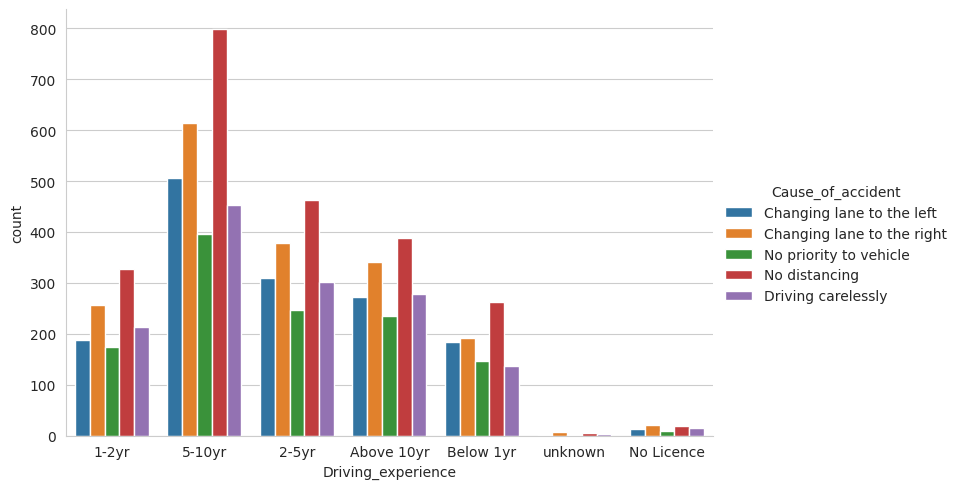

In [149]:
type_counts = df['Cause_of_accident'].value_counts()

top_5_types = type_counts.head(5).index
filtered_df = df[df['Cause_of_accident'].isin(top_5_types)]


sns.catplot(data=filtered_df, x='Driving_experience', hue="Cause_of_accident",kind="count", height=5, aspect=1.5)

* Ensure the visualizations are clear and informative.

1.   List item
2.   List item



### Create visualizations to illustrate the findings from the EDA.


In [150]:
def subplot(df, i, column, order=None):
    plt.subplot(2, 3 ,i)
    sns.barplot(data=df[column].value_counts().reset_index(), x = column, y = 'count', order=order)
    plt.xticks(rotation=45)

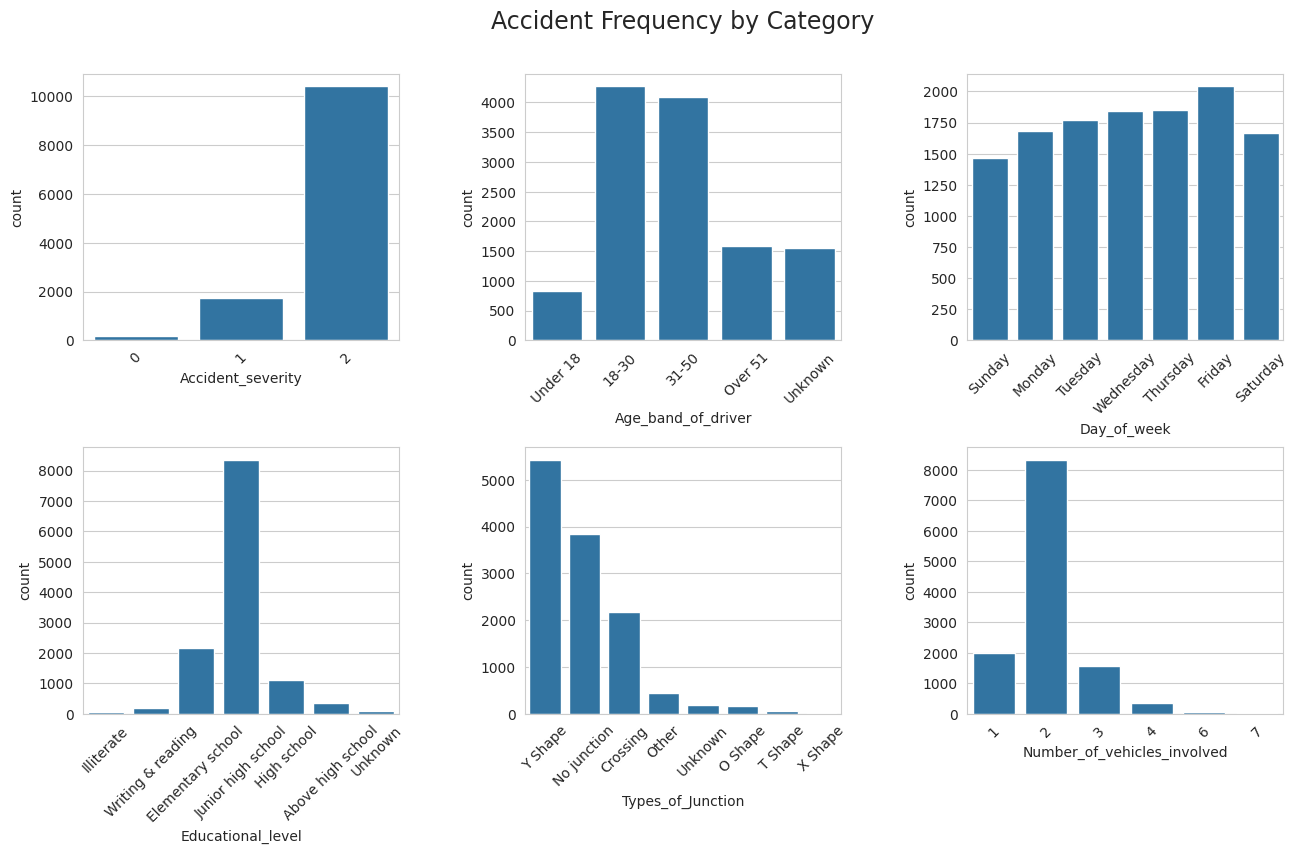

In [151]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
plt.suptitle("Accident Frequency by Category", fontsize=17)

label_mapping = {
    'Slight Injury',
    'Serious Injury',
    'Fatal injury'
}

subplot(df, i=1, column = 'Accident_severity')

age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
subplot(df, i=2, column = 'Age_band_of_driver', order= age_order)

day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
subplot(df, i=3, column = 'Day_of_week', order=day_order)

education_order= ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]
subplot(df, i=4, column = 'Educational_level', order=education_order)

subplot(df, i=5, column = 'Types_of_Junction')
subplot(df, i=6, column = 'Number_of_vehicles_involved')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

<Axes: xlabel='Number_of_casualties'>

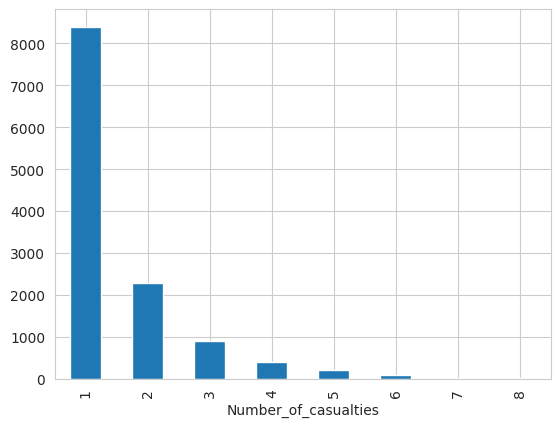

In [152]:
df['Number_of_casualties'].value_counts().plot(kind='bar')

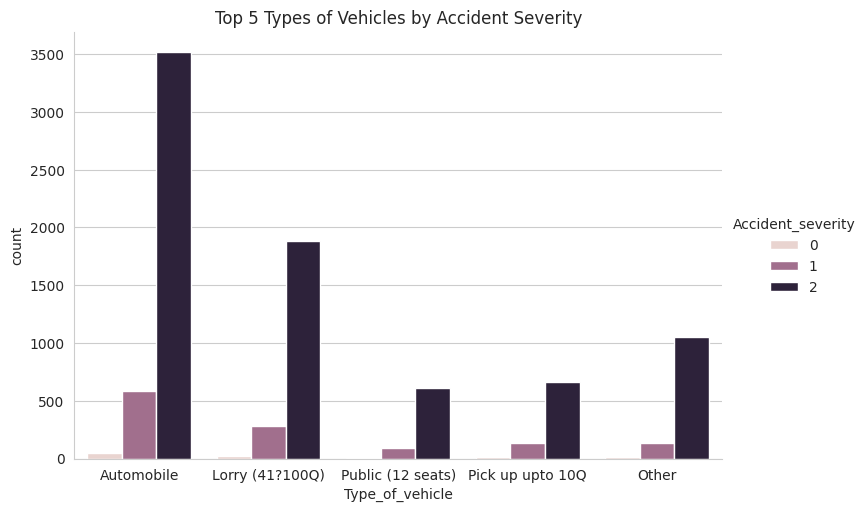

In [153]:
type_counts = df['Type_of_vehicle'].value_counts()

top_5_types = type_counts.head(5).index
filtered_df = df[df['Type_of_vehicle'].isin(top_5_types)]

sns.catplot(data=filtered_df, x='Type_of_vehicle', hue='Accident_severity', kind='count',aspect=1.5)
plt.title('Top 5 Types of Vehicles by Accident Severity')
plt.show()

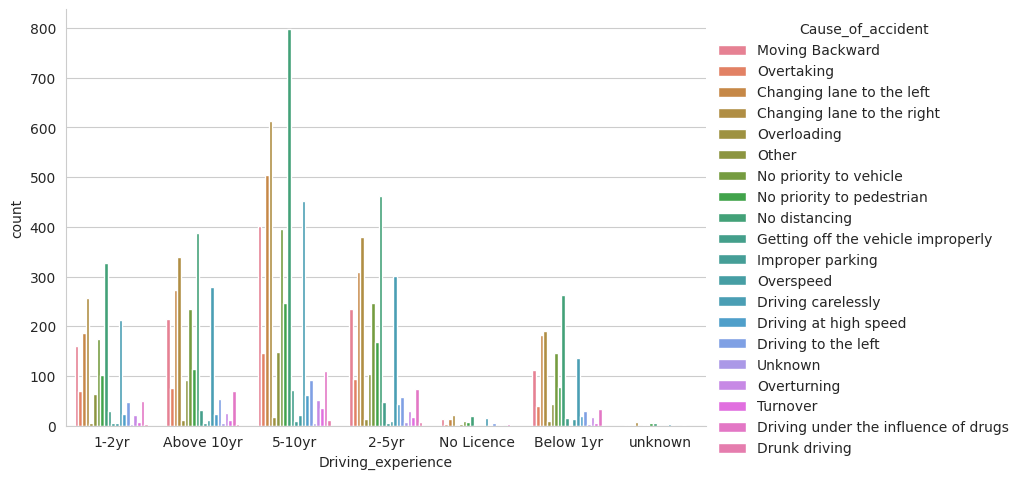

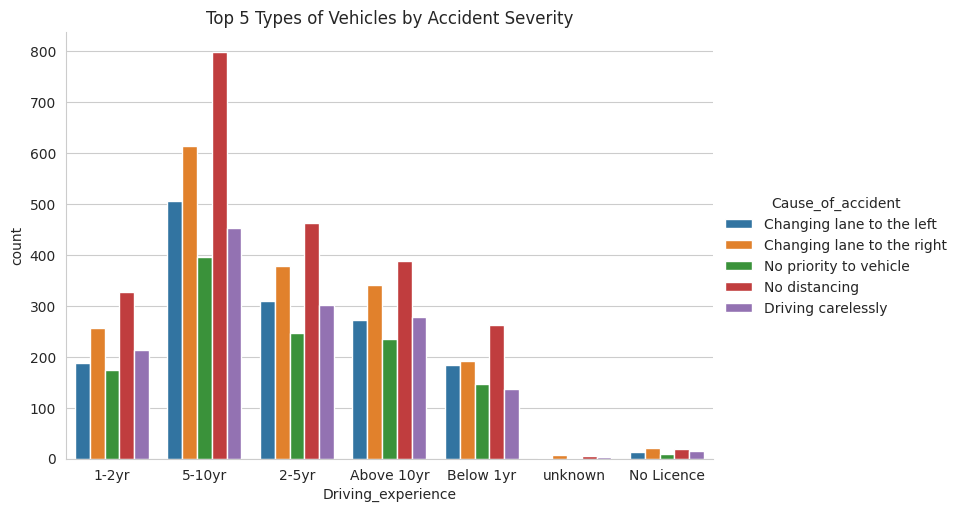

In [154]:
sns.catplot(data=df, x='Driving_experience', hue="Cause_of_accident",kind="count",aspect=1.5)

type_counts = df['Cause_of_accident'].value_counts()

top_5_types = type_counts.head(5).index
filtered_df = df[df['Cause_of_accident'].isin(top_5_types)]

sns.catplot(data=filtered_df, x='Driving_experience', hue='Cause_of_accident', kind='count',aspect=1.5)
plt.title('Top 5 Types of Vehicles by Accident Severity')
plt.show()

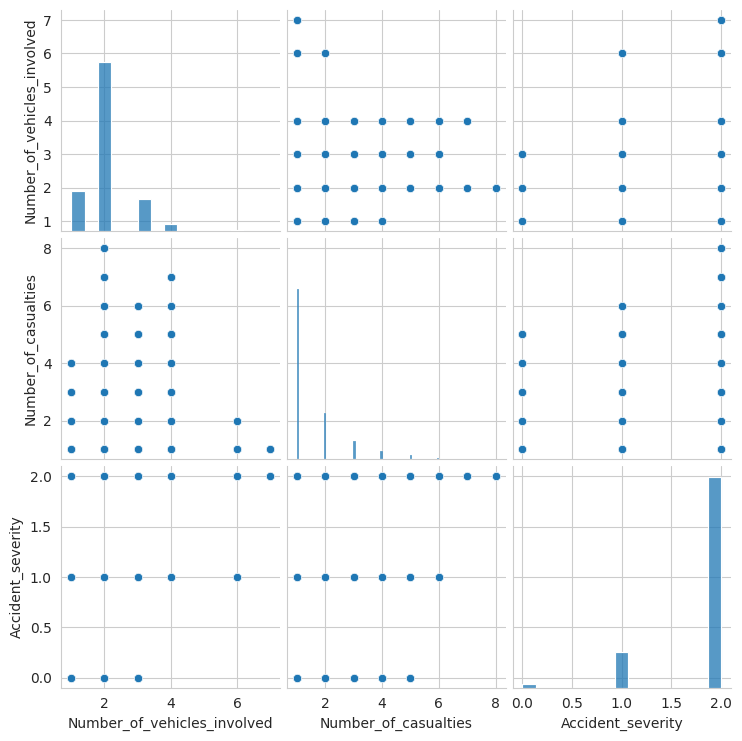

In [155]:
sns.pairplot(df)

(1.7, 1.9)

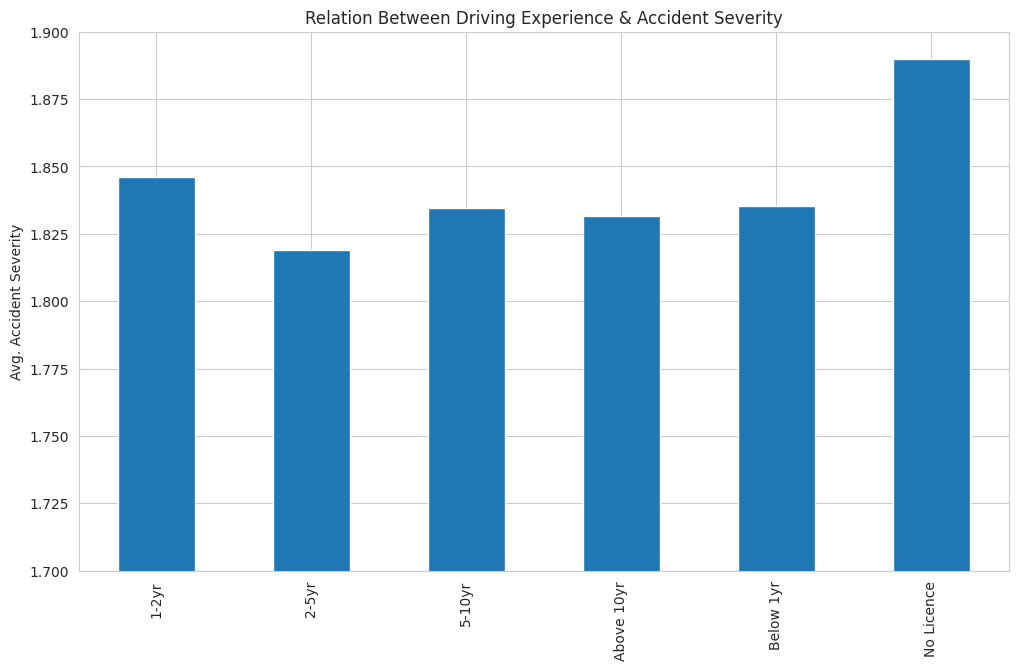

In [156]:

plt.figure(figsize =(12,7))
a= df.loc[df['Driving_experience'] !="Unknown"].loc[df['Driving_experience'] !="unknown"].groupby('Driving_experience')['Accident_severity'].mean()

bar_plot=a.plot(kind='bar')
bar_plot.set_ylabel("Count")
bar_plot.set_xlabel("")
bar_plot.set_ylabel("Avg. Accident Severity")
bar_plot.set_title("Relation Between Driving Experience & Accident Severity")
bar_plot.set_ylim([1.7,1.9])

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

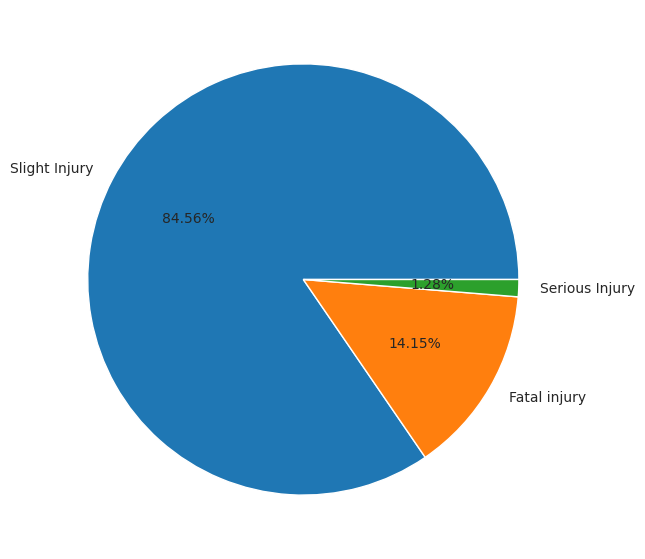

In [157]:
plt.figure(figsize=(10,7))
label_mapping = {
    'Slight Injury',
    'Serious Injury',
    'Fatal injury'
}
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=label_mapping,
        autopct='%2.2f%%')
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

#Insights

1-the majority of driver accidents are between 18-30 and 31-51 old

2-the the people who have no licence to drive causes heights accident severity in the roads

3-most of the drivers 5-10 years of experyans

#Conclusion

1-must confirm if all drivers they have license to ensure that all drivers received their training

